In [1]:
import pandas as pd

In [2]:
df_reviews = pd.read_csv('C:/Users/Karthik/scripts/IMDB Dataset.csv')

In [3]:
# take a sample of 1000 rows to make processing faster
df_positive = df_reviews[df_reviews['sentiment']=='positive'][:9000]
df_negative = df_reviews[df_reviews['sentiment']=='negative'][:1000]

In [4]:
df_rev_imdb = pd.concat([df_positive,df_negative])

In [5]:
df_rev_imdb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

# deling with imbalanced classes

<Axes: xlabel='sentiment'>

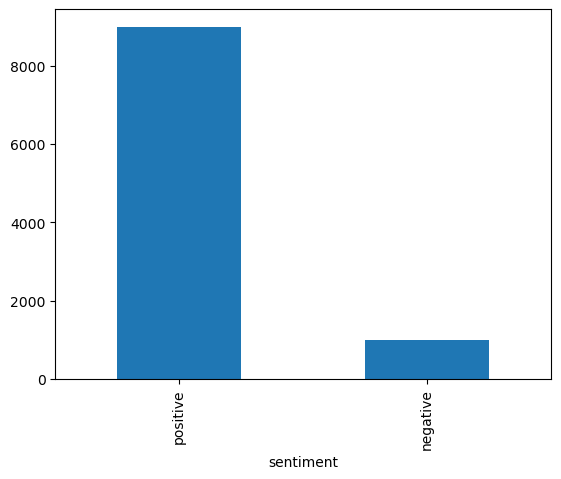

In [6]:
# make a barplot to show how data is distributed
df_rev_imdb.value_counts('sentiment').plot(kind='bar')

In [7]:
length_neg = len(df_rev_imdb[df_rev_imdb['sentiment']=='negative'])

In [8]:
length_pos = len(df_rev_imdb[df_rev_imdb['sentiment']=='positive'].sample(n=length_neg))

In [9]:
length_pos

1000

In [10]:
df_rev_pos = df_rev_imdb[df_rev_imdb['sentiment']=='positive'].sample(n=length_neg)
df_rev_neg = df_rev_imdb[df_rev_imdb['sentiment']=='negative']

In [11]:
# balancing data
df_rev_bal = pd.concat([df_rev_pos,df_rev_neg]).value_counts('sentiment')

In [12]:
df_rev_bal.reset_index(drop=True,inplace=True)

In [13]:
df_rev_bal

0    1000
1    1000
Name: count, dtype: int64

In [14]:
# balancing with randomundersample


In [15]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
rus.fit_resample(df_rev_imdb[['review']],df_rev_imdb['sentiment'])

(                                                  review
 3      Basically there's a family where a little boy ...
 7      This show was an amazing, fresh & innovative i...
 8      Encouraged by the positive comments about this...
 10     Phil the Alien is one of those quirky films wh...
 11     I saw this movie when I was about 12 when it c...
 ...                                                  ...
 10833  Knute Rockne led an extraordinary life and his...
 1039   At the height of the 'Celebrity Big Brother' r...
 5255   This is another of Robert Altman's underrated ...
 12237  This movie won a special award at Cannes for i...
 15014  You'd be forgiven to think a Finnish director ...
 
 [2000 rows x 1 columns],
 3        negative
 7        negative
 8        negative
 10       negative
 11       negative
            ...   
 10833    positive
 1039     positive
 5255     positive
 12237    positive
 15014    positive
 Name: sentiment, Length: 2000, dtype: object)

In [16]:
df_rev_bal,df_rev_bal['sentiment'] = rus.fit_resample(df_rev_imdb[['review']],df_rev_imdb['sentiment'])

# splitting data into train and test

In [17]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_rev_bal,test_size=0.33,
                              random_state=42)

In [18]:
train

,review,sentiment
144,"I just got back from this free screening, and ...",negative
1839,Claire Denis's movies seem to fall into one of...,negative
16588,"One must admit, that Dev has an eye for beauty...",positive
742,Mario Lewis of the Competitive Enterprise Inst...,negative
9464,"The first, and far better, of Kevin Kline's tw...",positive
...,...,...
10644,I saw the movie in Izmir as the closing film o...,positive
16133,This is a great documentary and above comments...,positive
1739,"Obviously, the comments above that fawn over t...",negative
2443,Robert Carlyle excels again. The period was ca...,positive


In [19]:
test

,review,sentiment
11301,Refreshing `lost' gem! Featuring effective dia...,positive
681,Never saw the original movie in the series...I...,negative
7513,"Once upon a time, in Sweden, there was a poor ...",positive
1821,"At the beginning of the film, you might double...",negative
549,Another Spanish movie about the 1936 Civil War...,positive
...,...,...
207,"I have seen most, if not all of the Laurel & H...",negative
7616,D.W. Griffith could have made any film he want...,positive
13483,"Cardiff, Wales. A bunch of 5 mates are deeply ...",positive
1051,I rented this movie with my friend for a good ...,negative


In [20]:
train_x,train_y = train['review'],train['sentiment']
test_x,test_y = test['review'],test['sentiment']

In [21]:
train_x.value_counts()
train_y.value_counts()

sentiment
negative    675
positive    665
Name: count, dtype: int64

# Text Representation Bag of Words

In [22]:
# count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love writing code in python. I love python code",
        "I have writing code in java. I have java code"]
df=pd.DataFrame({'review': ['review1','review2'],'text':text})
cv=CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])


In [23]:
df_dtm = pd.DataFrame(cv_matrix.toarray(),index = df['review'].values,
                      columns=cv.get_feature_names_out())

In [24]:
df_dtm

,code,java,love,python,writing
review1,2,0,2,2,1
review2,2,2,0,0,1


# TFIDF

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

text = ["I love writing code in python. I love python code",
        "I have writing code in java. I have java code"]
df=pd.DataFrame({'review': ['review1','review2'],'text':text})
tfidf = TfidfVectorizer(stop_words='english',norm=None)
tfidf_matrix = tfidf.fit_transform(df['text'])


In [26]:
pd.DataFrame(tfidf_matrix.toarray(),index=df['review'].values,
            columns = tfidf.get_feature_names_out())

,code,java,love,python,writing
review1,2.0,0.00000,2.81093,2.81093,1.0
review2,2.0,2.81093,0.00000,0.00000,1.0


# Turning out text data into numerical vectors

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

In [28]:
train_x_vector

<1340x20625 sparse matrix of type '<class 'numpy.float64'>'
	with 118834 stored elements in Compressed Sparse Row format>

In [29]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,index = train_x.index,columns=tfidf.get_feature_names_out())

,00,000,007,01pm,02,04,08,10,100,1000,...,zooming,zooms,zues,zzzzzzzzzzzzzzzzzz,æon,élan,émigré,ísnt,ïn,ünfaithful
144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16588,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
742,0,0,0,0,0,0,0,0.042791,0,0,...,0,0,0,0,0,0,0,0,0,0
9464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1739,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
test_x_vector = tfidf.transform(test_x)

In [31]:
test_x_vector

<660x20625 sparse matrix of type '<class 'numpy.float64'>'
	with 53486 stored elements in Compressed Sparse Row format>

# Model Selection

In [32]:
# Support Vector machine
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x_vector,train_y)

SVC(kernel='linear')

In [33]:
svc.predict(tfidf.transform(['i hate wathing this movie']))

array(['positive'], dtype=object)

# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector,train_y)

DecisionTreeClassifier()

# Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(train_x_vector.toarray(),train_y)

GaussianNB()

In [39]:
gnb.predict

<bound method _BaseNB.predict of GaussianNB()>

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_x_vector,train_y)

LogisticRegression()

# Model Evaluation

In [41]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y,
                 svc.predict(test_x_vector),
                 labels=['positive','negative'])

array([[290,  45],
       [ 60, 265]], dtype=int64)

# Mean accuracy

In [42]:
# calculate accuracy of the models

print(svc.score(test_x_vector,test_y))
print(dec_tree.score(test_x_vector,test_y))
print(gnb.score(test_x_vector.toarray(),test_y))
print(log_reg.score(test_x_vector,test_y))

0.8409090909090909
0.65
0.6348484848484849
0.8303030303030303


# F1 Score

In [43]:
from sklearn.metrics  import f1_score
f1_score(test_y,svc.predict(test_x_vector),
        labels=['positive','negative'],
        average=None)

array([0.84671533, 0.83464567])

# Classification Report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(test_y,svc.predict(test_x_vector),
                     labels=['positive','negative']))

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       335
    negative       0.85      0.82      0.83       325

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



# Tuning the model

## GridSearchCV

In [47]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[1,4,8,16,32],'kernel':['linear','rbf']}
svc=SVC()
svc_grid = GridSearchCV(svc,parameters,cv=5)
svc_grid.fit(train_x_vector,train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

In [ ]:
svc_grid.best_params_

In [ ]:
svc_grid.best_estimator_